In [86]:
#GENEROWANIE ZMIENNEJ Z ROZKŁADU PRZYBLIŻONEGO
#WYKRES ROZKŁADU PRZYBLIŻONEGO ORAZ HISTOGRAM , GDY GENERUJEMY ZMIENNĄ
#Z ROZKŁADU PRZYBLIŻONEGO
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import random as rn
import math
import matplotlib.lines as mlines
from scipy import integrate
from scipy import optimize as opt
import time

In [87]:
global N
global a
global b
a=0
b=math.pi
N=60

In [88]:
def gestosc(x):
    return 1.5*np.sin(x)*np.cos(x)*np.cos(x)

In [89]:
def przyblizenie(x): #gestosc ktorą pryzblizamy gestosc rzeczywsita
    k=x%((b-a)/N)
    if k==0:
        return gestosc(x)
    else:
        k=math.floor(x/((b-a)/N))
        return gestosc(k*((b-a)/N))

In [90]:
def losowanie_zmiennej(): #funkcja do losowania zmeinnej pryzbliżónej
    
    wysokosci=[]
    for k in range(0,N):
        wysokosci.append(przyblizenie(k*(b-a)/N))
    suma=sum(wysokosci)
    prawd=[]
    for k in range(0,N):
        prawd.append(wysokosci[k]/suma)

    przedzialy=[]
    przedzialy=np.cumsum(prawd)

    #przedzialy=przedzialy.tolist()

    U=rn.uniform(0,1)

    k=0
    for i in range(0,len(przedzialy)):
        if przedzialy[i]<U:
            pass
        else:
            k=i
            break
        
    X=rn.uniform((b-a)*k/N,(b-a)*(k+1)/N)
    return X

In [91]:
def proba_przyb(n): #proba rozkładu przybliżonego
    proba=[]
    for i in range(0,n):
        proba.append(losowanie_zmiennej())
    return proba

In [7]:
def h(x): #szukamy odpowiedniego C
    return gestosc(x)/przyblizenie(x)

In [93]:
N=60 #tu wpisujemy rózne N i wyołujemy od tej komórki, niższe komórki celem wyrysowania odpowiednich wykresów dla poszczególnych N
m = opt.fminbound(lambda x: -h(x), 0, math.pi)
C=h(m) #supremum
global C
print(C)

1.0625721314097685


In [94]:
def generowanie(): #generuje zmienna losowa o gestosci 3/2sinxcos^2
    m = C
    u1=losowanie_zmiennej() #y from g 
    u2=rn.random() #u
    vfunc=np.vectorize(gestosc)
    z=vfunc(u1)
    z=gestosc(u1)/(m*przyblizenie(u1))
    #print(u2,'u2','z',z)
    if u2<z: #u<f(y)/(c *g(y)) http://www.di.fc.ul.pt/~jpn/r/ECS/index.html !!!!!!!!
        return u1
    else:
        return generowanie()

In [95]:
def proba_rozkladu_dokladnego_za_pomoca_przyb(n):
    proba=[]
    for i in range(0,n):
        proba.append(generowanie())
    return proba

In [96]:
def zad10zmienna_losowa(f,a,b): #generuje zmienna losowa o zadanej gestosci->standordowa metoda akceptacji odrzucenia
    
    m = opt.fminbound(lambda x: -f(x), a, b)
    m=f(m)
    u1=rn.uniform(a,b)
    u2=m*rn.random()
    #print('m',m)
    vfunc=np.vectorize(f)
    z=vfunc(u1)
    z=f(u1)
    #print('u2',u2,'z',z)
    if u2<z:
        return u1
    else:
        return zad10zmienna_losowa(f,a,b)

In [97]:
def generuj_standardowo(n,f,a,b): #generuje probke danych zmiennej losowej
    probka=[]
    for i in range(0,n):
        probka.append(zad10zmienna_losowa(f,a,b))
    return probka

In [29]:
probka=generuj_standardowo(10000,gestosc,a,b)

In [98]:
proba=proba_rozkladu_dokladnego_za_pomoca_przyb(10000)

Text(0.5,1,'gdy korzystamy z gestosci przyblizonej N=60')

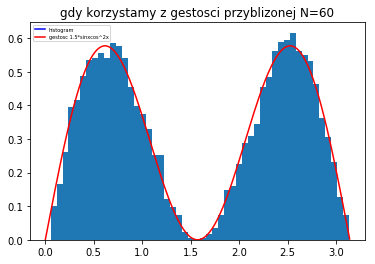

In [99]:
plt.hist(proba,bins=50,normed=True)
vfunc = np.vectorize(gestosc)
y=vfunc(t)
plt.plot(t,y,'r')
blue_line = mlines.Line2D([], [], color='red', 
                          markersize=5, label='gestosc 1.5*sinxcos^2x')
red_line = mlines.Line2D([], [], color='blue', 
                          markersize=5, label='histogram')
plt.legend(handles=[red_line,blue_line],prop={'size':5})

plt.title('gdy korzystamy z gestosci przyblizonej N=60')

In [32]:
import scipy.stats as stats
import statsmodels.api as sm

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Text(0.5,1,'N=60')

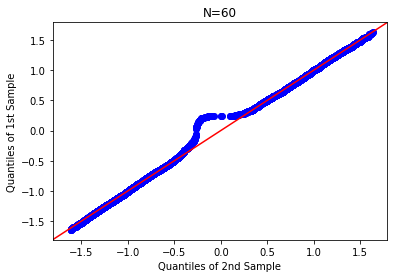

In [33]:
x = probka
x=np.array(x)
y = proba
y=np.array(y)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)
fig = pp_x.qqplot(line='45', other=pp_y)
plt.title("N=60")

In [34]:
q = stats.anderson_ksamp([np.sort(probka),np.sort(proba)])
print(q)

Anderson_ksampResult(statistic=0.8286151215447464, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752]), significance_level=0.1496027620830405)


Text(0.5,1,'losowanie zmiennej przybliżonej, N=60')

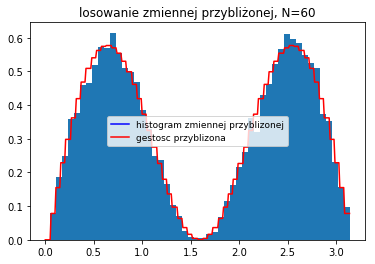

In [78]:
#wykres
N=60
t=np.arange(a,b,0.01)
p=proba_przyb(10000)

vfunc = np.vectorize(przyblizenie)
y=vfunc(t)
plt.plot(t,y,'r')

plt.hist(p,bins=50,normed=True)

blue_line = mlines.Line2D([], [], color='red', 
                          markersize=5, label='gestosc przyblizona')
red_line = mlines.Line2D([], [], color='blue', 
                          markersize=5, label='histogram zmiennej przyblizonej')
plt.legend(handles=[red_line,blue_line],prop={'size':9})
plt.title('losowanie zmiennej przybliżonej, N=60')

Text(0.5,1,'metoda standardowa')

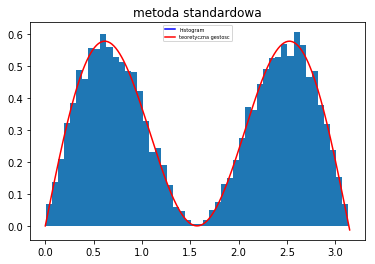

In [82]:
probka=generuj_standardowo(10000,gestosc,a,b)
plt.hist(probka,bins=50,normed=True)
x= np.arange(a, b+0.01, 0.01)
vfunc = np.vectorize(gestosc)
y=vfunc(x)
plt.plot(x,y,'r')
blue_line = mlines.Line2D([], [], color='red', 
                          markersize=5, label='teoretyczna gestosc')
red_line = mlines.Line2D([], [], color='blue', 
                          markersize=5, label='histogram')
plt.legend(handles=[red_line,blue_line],prop={'size':5})
plt.title('metoda standardowa')